In [ ]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DA_G9/cleaned_and_encoded_dataset2.csv')
data.head()

,customer_id,bad_flag,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
0,CUST0001,1,1100,25860.0,39025.0,10.5,0,0,94.366667,1,...,1,0,0,0,0,0,0,1,1,0
1,CUST0002,1,1300,70053.0,68400.0,7.0,0,2,121.833333,0,...,1,0,0,0,0,0,1,0,1,0
2,CUST0003,1,1500,13500.0,16700.0,4.0,0,0,149.466667,1,...,1,0,0,0,0,0,0,1,1,0
3,CUST0004,0,1700,97800.0,112000.0,3.0,0,0,93.333333,0,...,1,0,1,0,0,0,1,0,0,0
4,CUST0005,1,1700,30548.0,40320.0,9.0,0,0,101.466002,1,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
df_encoded = data.iloc[:,1:]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bad_flag                       5796 non-null   int64  
 1   loan_amt_requested             5796 non-null   int64  
 2   mort_due                       5796 non-null   float64
 3   current_property_value         5796 non-null   float64
 4   years_on_job                   5796 non-null   float64
 5   no_of_derog                    5796 non-null   int64  
 6   no_of_delinq                   5796 non-null   int64  
 7   age_of_oldest_cl               5796 non-null   float64
 8   no_of_recent_credit_inquiries  5796 non-null   int64  
 9   no_of_cl                       5796 non-null   int64  
 10  debt_to_income_ratio           5796 non-null   float64
 11  cl_delinquency_ratio           5796 non-null   float64
 12  approx_income                  5796 non-null   f

In [ ]:
# Assuming your dataset is loaded into a DataFrame 'df'
x = df_encoded.drop('bad_flag', axis=1)  # Features (all columns except 'BAD')
y = df_encoded['bad_flag']               # Target variable

In [ ]:
# Calculate indices assuming 'df_encoded' is your DataFrame
categorical_features_indices = [df_encoded.columns.get_loc(col) for col in df_encoded.columns if 'job_' in col or 'loan_reason_' in col or 'income_group_' in col]

# Print to verify
print("Categorical feature indices:", categorical_features_indices)
print("DataFrame columns:", list(df_encoded.columns))


Categorical feature indices: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
DataFrame columns: ['bad_flag', 'loan_amt_requested', 'mort_due', 'current_property_value', 'years_on_job', 'no_of_derog', 'no_of_delinq', 'age_of_oldest_cl', 'no_of_recent_credit_inquiries', 'no_of_cl', 'debt_to_income_ratio', 'cl_delinquency_ratio', 'approx_income', 'combined_ltv_ratio', 'loan_reason_homeImp', 'job_mgr', 'job_office', 'job_profExe', 'job_sales', 'job_self', 'income_group_high', 'income_group_lowMed', 'job_other_nonProvided', 'loan_reason_debtCon_np']


In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Define features and target
x = df_encoded.drop('bad_flag', axis=1)
y = df_encoded['bad_flag']

# Correctly identifying categorical indices
categorical_features_indices = [i for i, col in enumerate(x.columns) if 'job_' in col or 'loan_reason_' in col or 'income_group_' in col]

# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTENC to your training data
x_train_resampled, y_train_resampled = smote_nc.fit_resample(x_train, y_train)

# Check the new class distribution
print(f"After SMOTENC, class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")


After SMOTENC, class distribution: {np.int64(0): np.int64(3724), np.int64(1): np.int64(3724)}


In [ ]:
# Check the balance of the classes in the resampled training set
print(y_train.value_counts())
print(y_train_resampled.value_counts()) # 3x (+2812) of BAD = 1 increasing

bad_flag
0    3724
1     912
Name: count, dtype: int64
bad_flag
0    3724
1    3724
Name: count, dtype: int64


In [ ]:
# Extracting original minority class samples
original_minority_samples = x_train[y_train == 1] #BAD = 1 is the minority we focused

# Assuming the first 912 rows of the resampled data are from the original data
resampled_minority_samples = x_train_resampled[y_train_resampled == 1].iloc[:912]

In [ ]:
x_train[y_train == 1].describe()

,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,no_of_cl,debt_to_income_ratio,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,16915.679825,67936.553092,97386.505253,7.826425,0.673246,1.162281,146.028929,1.767544,21.169956,36.998205,...,0.326754,0.154605,0.106360,0.175439,0.035088,0.050439,0.519737,0.480263,0.478070,0.673246
std,11192.684502,56699.778102,73940.338140,6.847495,1.470018,1.881209,88.937365,2.255064,11.775836,11.265290,...,0.469284,0.361726,0.308467,0.380551,0.184103,0.218968,0.499884,0.499884,0.499793,0.469284
min,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9575.000000,36000.000000,58200.500000,2.500000,0.000000,0.000000,92.984845,0.000000,13.000000,34.861281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.000000,57448.500000,81482.500000,6.000000,0.000000,0.000000,129.883333,1.000000,20.000000,35.245224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,21125.000000,83337.000000,116971.000000,11.000000,1.000000,2.000000,187.316667,2.250000,27.000000,36.170905,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,77400.000000,609809.984900,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Check if the first 912 rows are original train data
x_train_resampled[y_train_resampled == 1].iloc[:912].describe()

,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,no_of_cl,debt_to_income_ratio,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,16915.679825,67936.553092,97386.505253,7.826425,0.673246,1.162281,146.028929,1.767544,21.169956,36.998205,...,0.326754,0.154605,0.106360,0.175439,0.035088,0.050439,0.519737,0.480263,0.478070,0.673246
std,11192.684502,56699.778102,73940.338140,6.847495,1.470018,1.881209,88.937365,2.255064,11.775836,11.265290,...,0.469284,0.361726,0.308467,0.380551,0.184103,0.218968,0.499884,0.499884,0.499793,0.469284
min,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9575.000000,36000.000000,58200.500000,2.500000,0.000000,0.000000,92.984845,0.000000,13.000000,34.861281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.000000,57448.500000,81482.500000,6.000000,0.000000,0.000000,129.883333,1.000000,20.000000,35.245224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,21125.000000,83337.000000,116971.000000,11.000000,1.000000,2.000000,187.316667,2.250000,27.000000,36.170905,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,77400.000000,609809.984900,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
 x_train_resampled[y_train_resampled == 1].iloc[913:].describe()

,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,no_of_cl,debt_to_income_ratio,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
count,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,...,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000
mean,17058.789755,66989.779914,95726.927163,7.860308,0.457844,0.849875,142.328348,1.434721,20.762362,36.831131,...,0.210957,0.040911,0.016720,0.060121,0.003913,0.008182,0.505870,0.494130,0.478833,0.789043
std,10469.300251,53769.874156,68834.332296,5.598196,1.093454,1.481637,65.662332,1.827116,9.949790,9.131181,...,0.408060,0.198119,0.128243,0.237753,0.062444,0.090100,0.500054,0.500054,0.499641,0.408060
min,1137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.557461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9916.000000,35232.399671,57801.993589,3.572258,0.000000,0.000000,100.738110,0.000000,14.000000,34.867267,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14872.000000,56414.749498,80089.228671,6.874912,0.000000,0.000000,133.605190,1.000000,20.000000,35.292163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,21276.000000,81201.363355,116375.218413,10.999150,0.000000,1.000000,176.739387,2.000000,26.000000,36.178095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,76276.000000,609515.178115,855496.001374,33.348767,9.000000,14.000000,1121.358219,16.000000,68.000000,191.621220,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
 x_train_resampled[y_train_resampled == 1].describe()

,loan_amt_requested,mort_due,current_property_value,years_on_job,no_of_derog,no_of_delinq,age_of_oldest_cl,no_of_recent_credit_inquiries,no_of_cl,debt_to_income_ratio,...,loan_reason_homeImp,job_mgr,job_office,job_profExe,job_sales,job_self,income_group_high,income_group_lowMed,job_other_nonProvided,loan_reason_debtCon_np
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,...,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,17023.070086,67214.145439,96121.170536,7.850168,0.512352,0.926423,143.255420,1.515843,20.861439,36.875072,...,0.239527,0.068743,0.038668,0.088346,0.011547,0.018528,0.509130,0.490870,0.478518,0.760473
std,10648.340223,54490.588042,70107.609567,5.927934,1.204615,1.594026,72.068183,1.945543,10.425239,9.696589,...,0.426852,0.253051,0.192829,0.283835,0.106848,0.134870,0.499984,0.499984,0.499605,0.426852
min,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9873.500000,35461.360910,57878.939190,3.260138,0.000000,0.000000,99.067437,0.000000,14.000000,34.867410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14895.500000,56877.670955,80394.491343,6.782653,0.000000,0.000000,132.900000,1.000000,20.000000,35.245224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,21256.750000,81771.775099,116400.364082,11.000000,1.000000,1.000000,179.524321,2.000000,27.000000,36.170905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,77400.000000,609809.984900,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train.value_counts()

,count
bad_flag,
0,3724
1,912


In [ ]:
y_train_resampled.value_counts()

,count
bad_flag,
0,3724
1,3724


In [ ]:
y_test.value_counts()

,count
bad_flag,
0,932
1,228


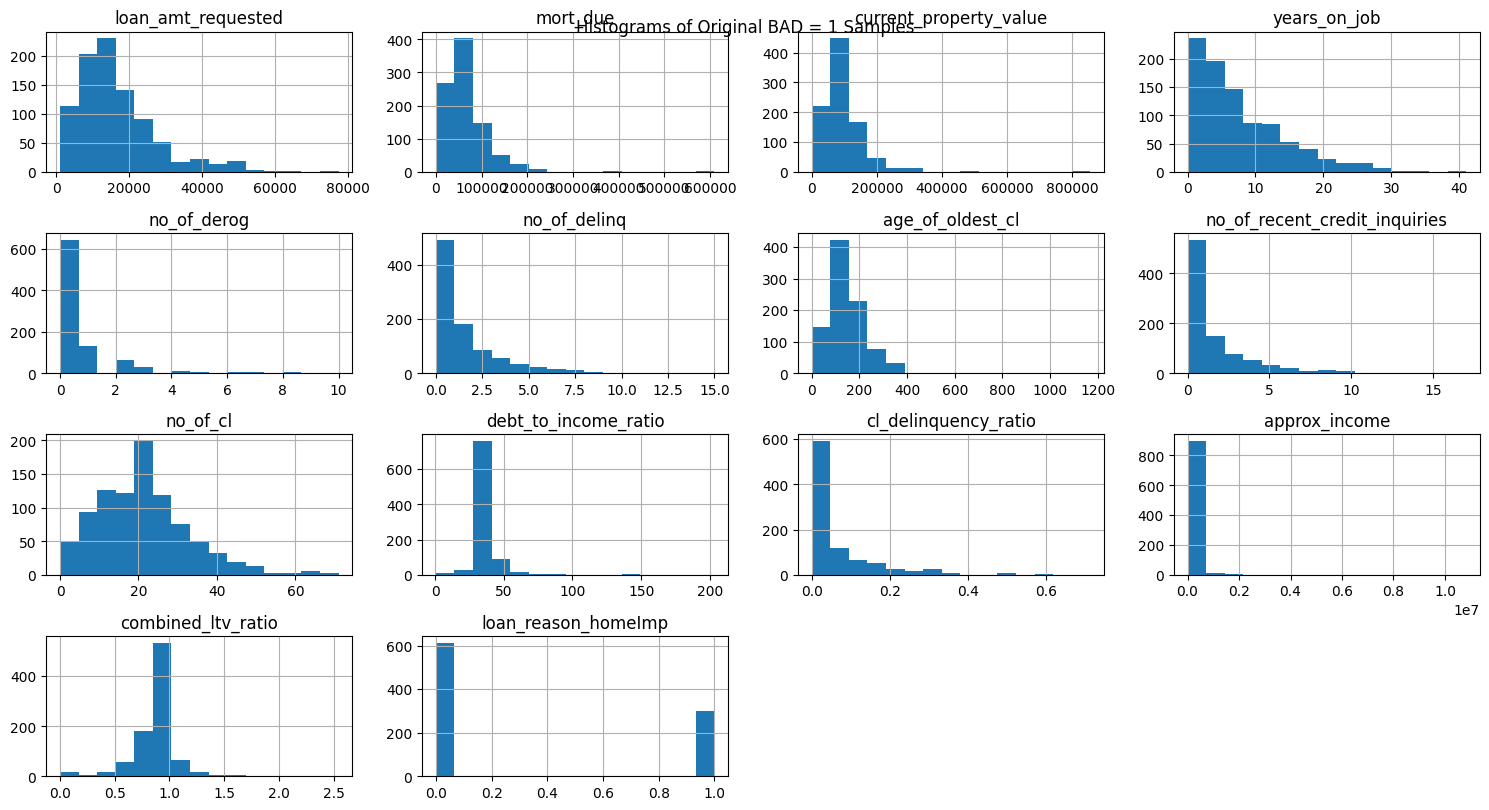

In [ ]:
# Plot histograms for synthetic samples
x_train_resampled[y_train_resampled == 1].iloc[:912, :14].hist(figsize=(15, 12), bins=15, layout=(6, 4))
plt.tight_layout()
plt.suptitle('Histograms of Original BAD = 1 Samples')
plt.show()

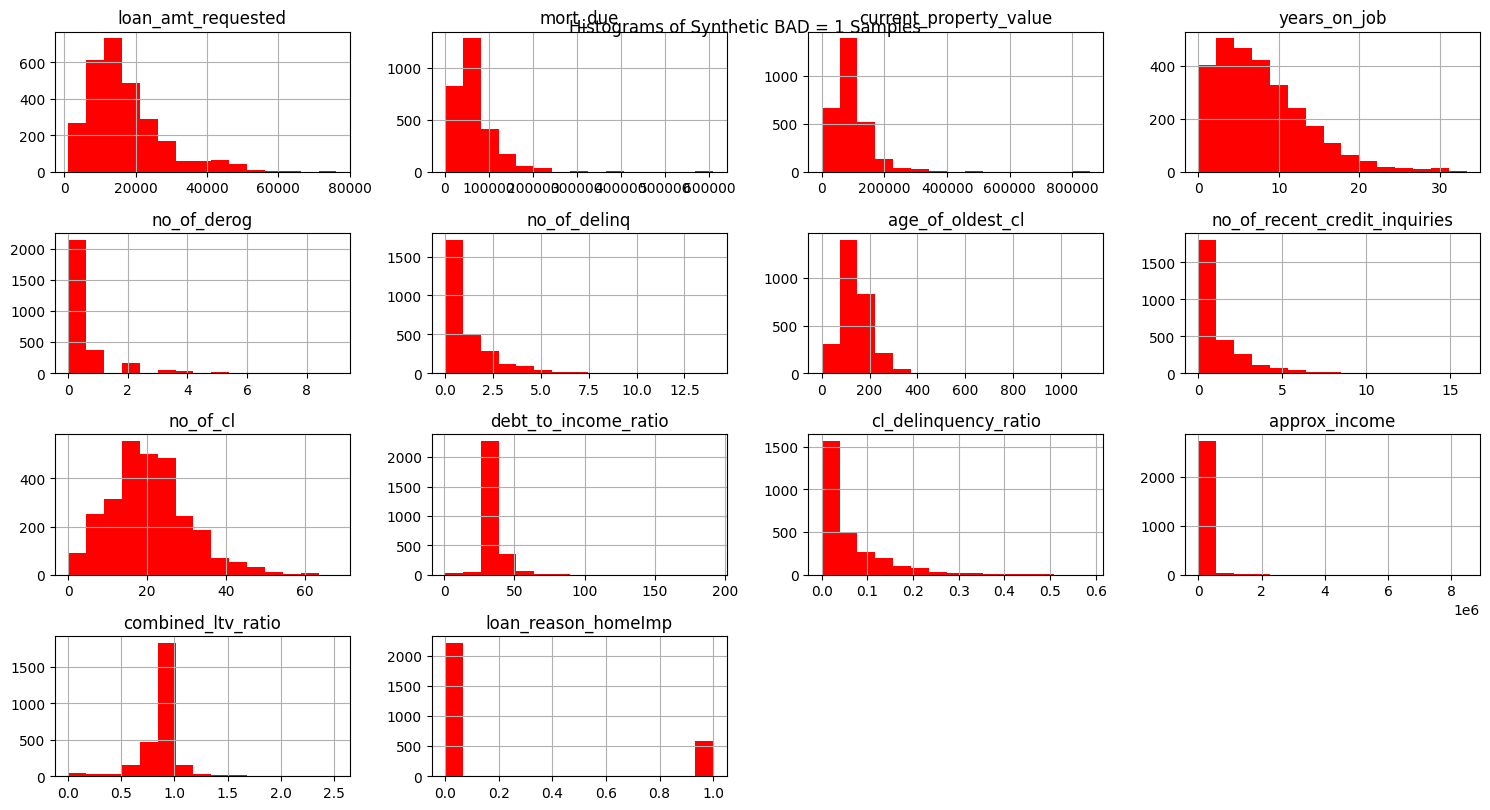

In [ ]:
# Plot histograms for synthetic samples to check if they have the same characteristics
x_train_resampled[y_train_resampled == 1].iloc[913:,:14].hist(figsize=(15, 12), bins=15, layout=(6, 4), color = 'red')
plt.tight_layout()
plt.suptitle('Histograms of Synthetic BAD = 1 Samples')
plt.show()

In [ ]:
Convert

# Save the DataFrame to CSV in the specified Drive path
raw_data.to_csv(path, index=False)

x_train_resampled_df = pd.DataFrame(x_train_resampled, columns=x_train_resampled.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['bad_flag'])

x_test_df = pd.DataFrame(x_test, columns=x_test.columns)
y_test_df = pd.DataFrame(y_test, columns=['bad_flag'])

# Save these DataFrames to CSV files
x_train_resampled_df.to_csv('/content/drive/MyDrive/DA_G9/x_train_smote2.csv', index=False)
y_train_resampled_df.to_csv('/content/drive/MyDrive/DA_G9/y_train_smote2.csv', index=False)
x_test_df.to_csv('/content/drive/MyDrive/DA_G9/x_test_smote2.csv', index=False)
y_test_df.to_csv('/content/drive/MyDrive/DA_G9/y_test_smote2.csv', index=False)